In [97]:
import os
import numpy as np
import pandas as pd

file_path = './test_results_r2.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]

In [98]:
df = df_raw.copy()

In [99]:
df = df[df['model']=='Resnet18']
df = df[df['pgm_noise_scale'] == 0]
df = df[df['drift_model'] == 'log_rev']
# df = df[df['Gmin']=='default']
df = df[(df['FT_lr']==1e-4) | (df['FT_lr']=='-')]
# df = df[(df['custom_loss']=='smoothL1') | (df['custom_loss']=='-')]
df = df[df['custom_loss']=='-']
df = df[df['drift_var']==0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


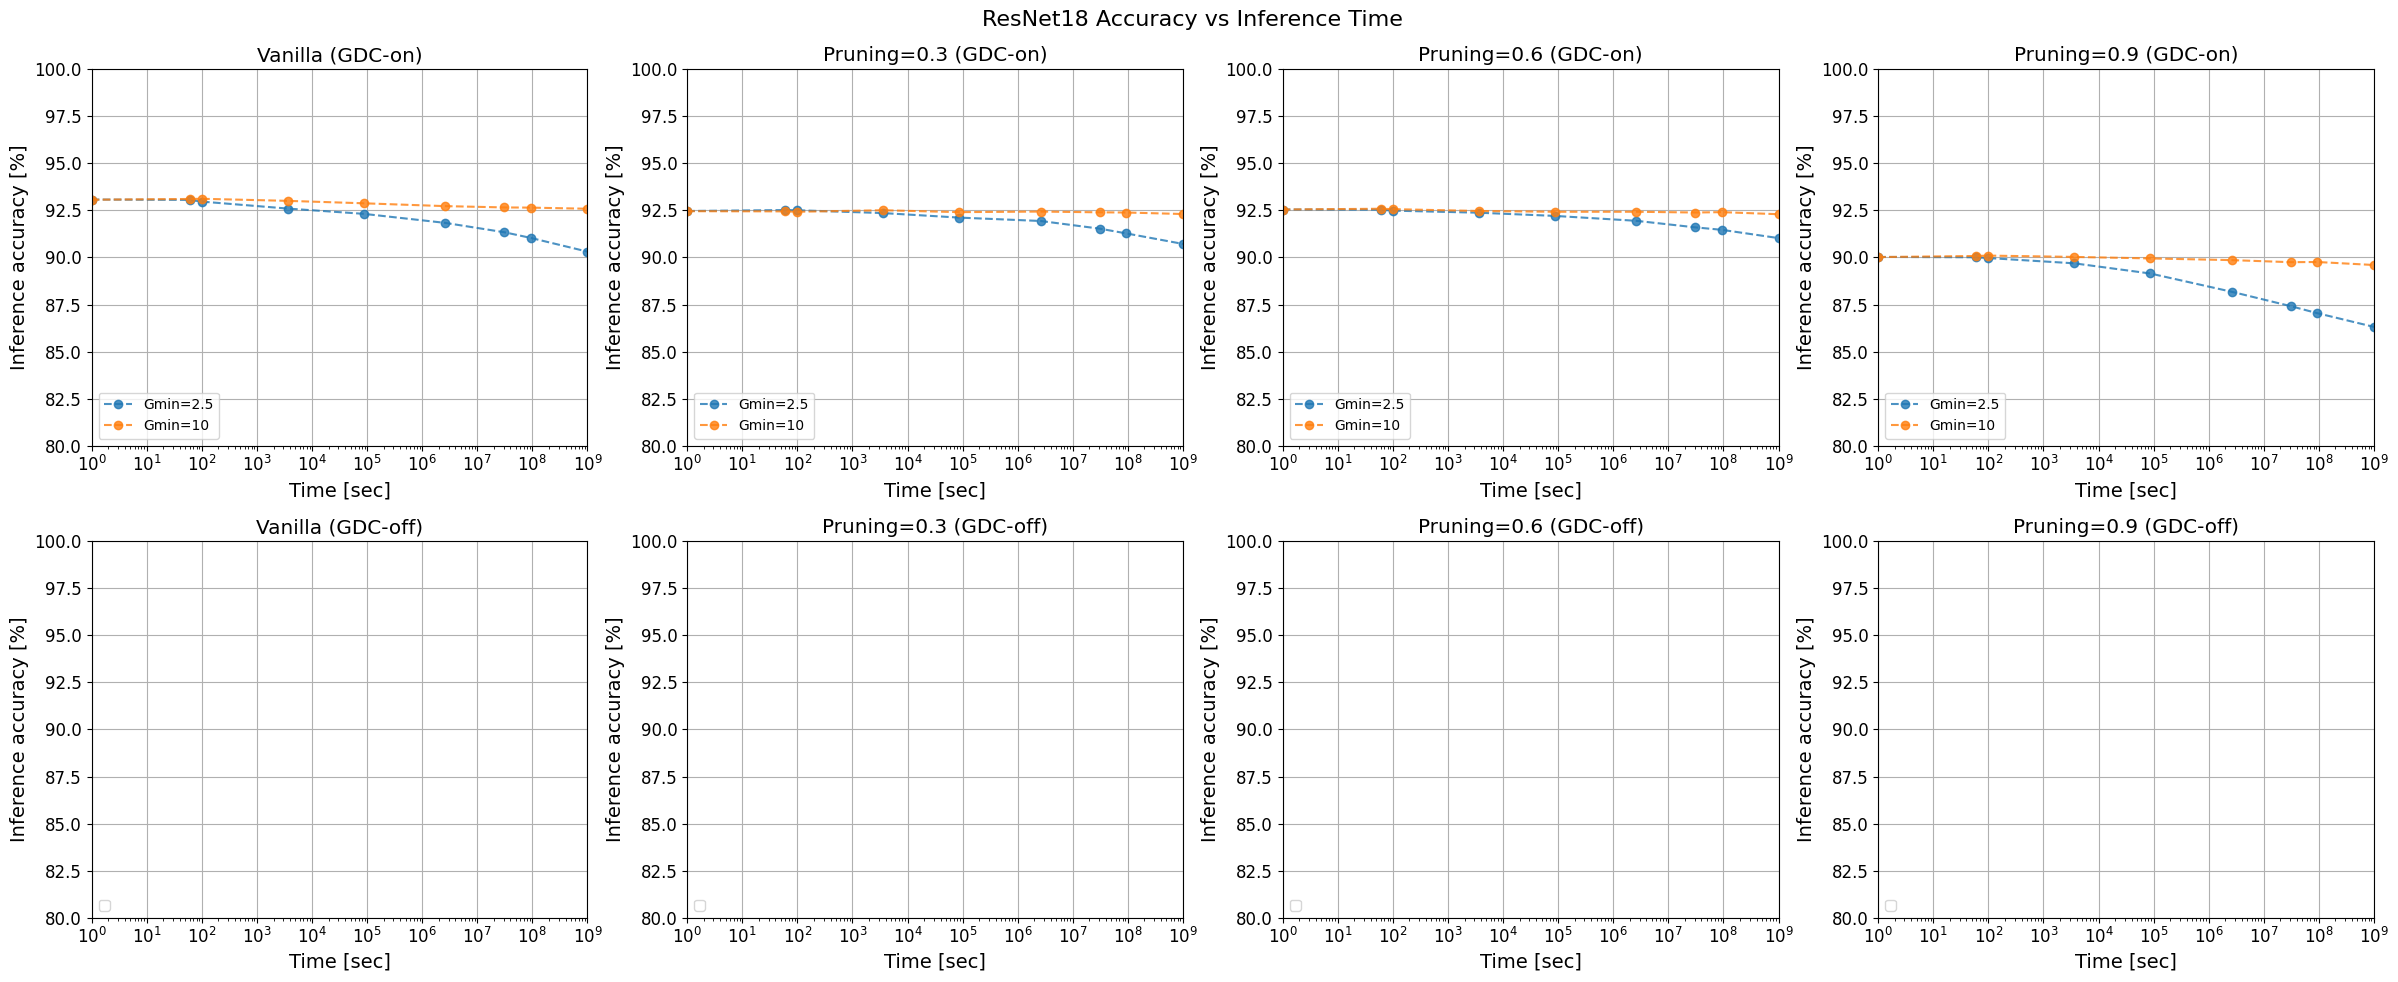

In [101]:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(24, 10))
plt.rcParams.update({'font.size': 12})

# Remove 'pruned' from model_type
df = df[~df['model_type'].str.endswith('pruned')]

def plot_accuracy_gmin(ax, data, title):
    ax.grid(True)
    
    # Group by Gmin and plot
    for gmin_val in data['Gmin'].unique():
        df_gmin = data[data['Gmin'] == gmin_val]
        if not df_gmin.empty:
            if gmin_val == 'default':
                ax.plot(df_gmin['inf_time'], df_gmin['accuracy'], 
                        marker='o', label=f'Gmin={gmin_val}', alpha=1, color='black')
            else:
                ax.plot(df_gmin['inf_time'], df_gmin['accuracy'], 
                        marker='o', label=f'Gmin={gmin_val}', alpha=0.8, linestyle='--')
    
    ax.set_title(title)
    ax.set_xlabel('Time [sec]', fontsize=14)
    ax.set_ylabel('Inference accuracy [%]', fontsize=14)
    ax.set_ylim(80, 100)
    ax.set_xlim(1, 1000000000)
    ax.set_xscale('log')
    ax.legend(fontsize=10, loc='lower left')

# Plot for each GDC condition
for row_idx, gdc_val in enumerate(['on', 'off']):
    df_gdc = df[df['GDC'] == gdc_val]
    axes_row = [ax1, ax2, ax3, ax4] if row_idx == 0 else [ax5, ax6, ax7, ax8]
    
    # Plot vanilla model
    vanilla_df = df_gdc[df_gdc['model_type'] == 'vanilla']
    plot_accuracy_gmin(axes_row[0], vanilla_df, f"Vanilla (GDC-{gdc_val})")
    
    # Plot each pruning ratio
    for idx, pruning_val in enumerate([0.3, 0.6, 0.9]):
        pruned_df = df_gdc[df_gdc['pruning'] == pruning_val]
        plot_accuracy_gmin(axes_row[idx+1], pruned_df, f"Pruning={pruning_val} (GDC-{gdc_val})")

plt.suptitle('ResNet18 Accuracy vs Inference Time', fontsize=16)
plt.tight_layout()
plt.show()

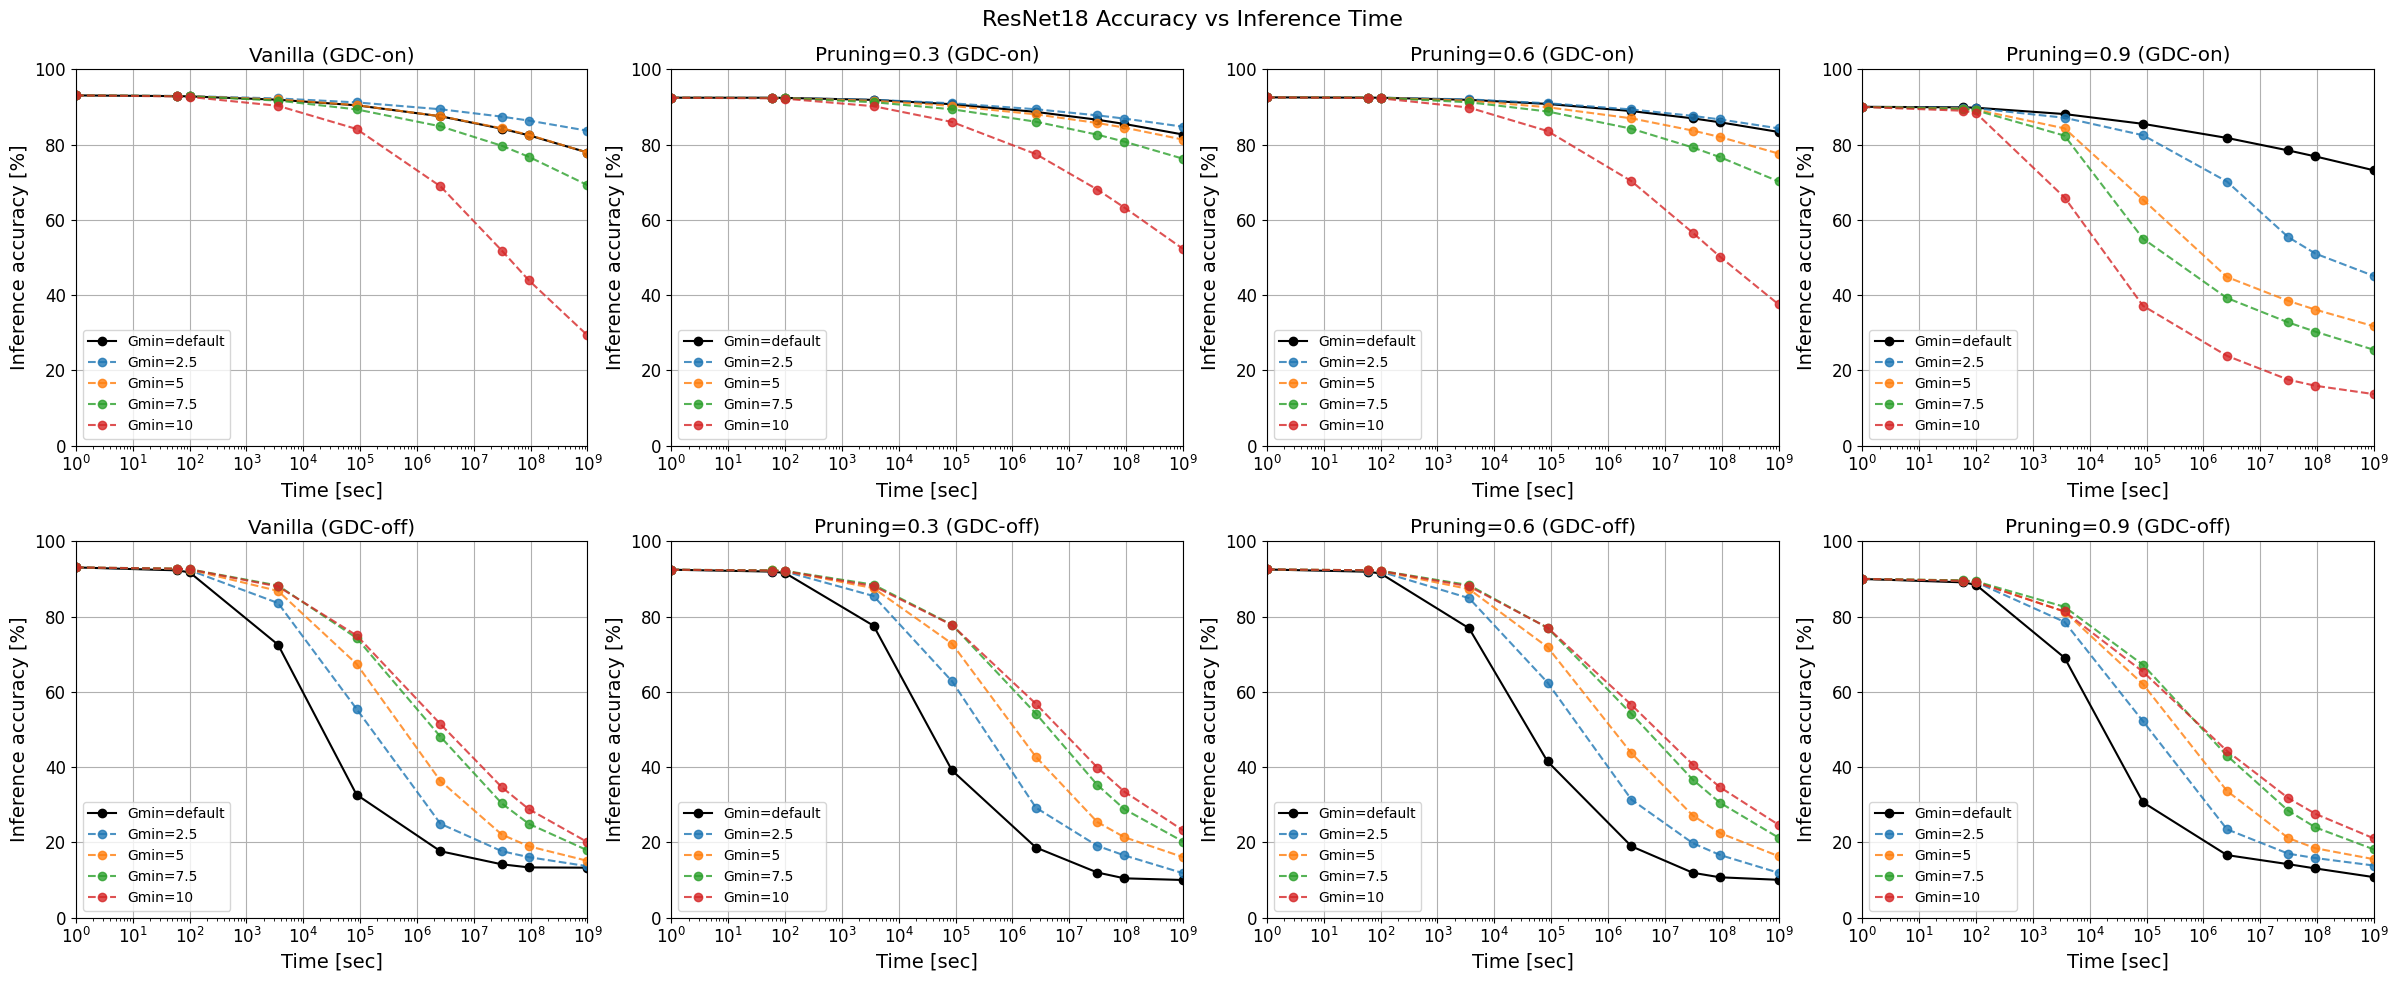

In [93]:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(24, 10))
plt.rcParams.update({'font.size': 12})

# Remove 'pruned' from model_type
df = df[~df['model_type'].str.endswith('pruned')]

def plot_accuracy_gmin(ax, data, title):
    ax.grid(True)
    
    # Group by Gmin and plot
    for gmin_val in data['Gmin'].unique():
        df_gmin = data[data['Gmin'] == gmin_val]
        if not df_gmin.empty:
            if gmin_val == 'default':
                ax.plot(df_gmin['inf_time'], df_gmin['accuracy'], 
                        marker='o', label=f'Gmin={gmin_val}', alpha=1, color='black')
            else:
                ax.plot(df_gmin['inf_time'], df_gmin['accuracy'], 
                        marker='o', label=f'Gmin={gmin_val}', alpha=0.8, linestyle='--')
    
    ax.set_title(title)
    ax.set_xlabel('Time [sec]', fontsize=14)
    ax.set_ylabel('Inference accuracy [%]', fontsize=14)
    ax.set_ylim(0, 100)
    ax.set_xlim(1, 1000000000)
    ax.set_xscale('log')
    ax.legend(fontsize=10, loc='lower left')

# Plot for each GDC condition
for row_idx, gdc_val in enumerate(['on', 'off']):
    df_gdc = df[df['GDC'] == gdc_val]
    axes_row = [ax1, ax2, ax3, ax4] if row_idx == 0 else [ax5, ax6, ax7, ax8]
    
    # Plot vanilla model
    vanilla_df = df_gdc[df_gdc['model_type'] == 'vanilla']
    plot_accuracy_gmin(axes_row[0], vanilla_df, f"Vanilla (GDC-{gdc_val})")
    
    # Plot each pruning ratio
    for idx, pruning_val in enumerate([0.3, 0.6, 0.9]):
        pruned_df = df_gdc[df_gdc['pruning'] == pruning_val]
        plot_accuracy_gmin(axes_row[idx+1], pruned_df, f"Pruning={pruning_val} (GDC-{gdc_val})")

plt.suptitle('ResNet18 Accuracy vs Inference Time', fontsize=16)
plt.tight_layout()
plt.show()

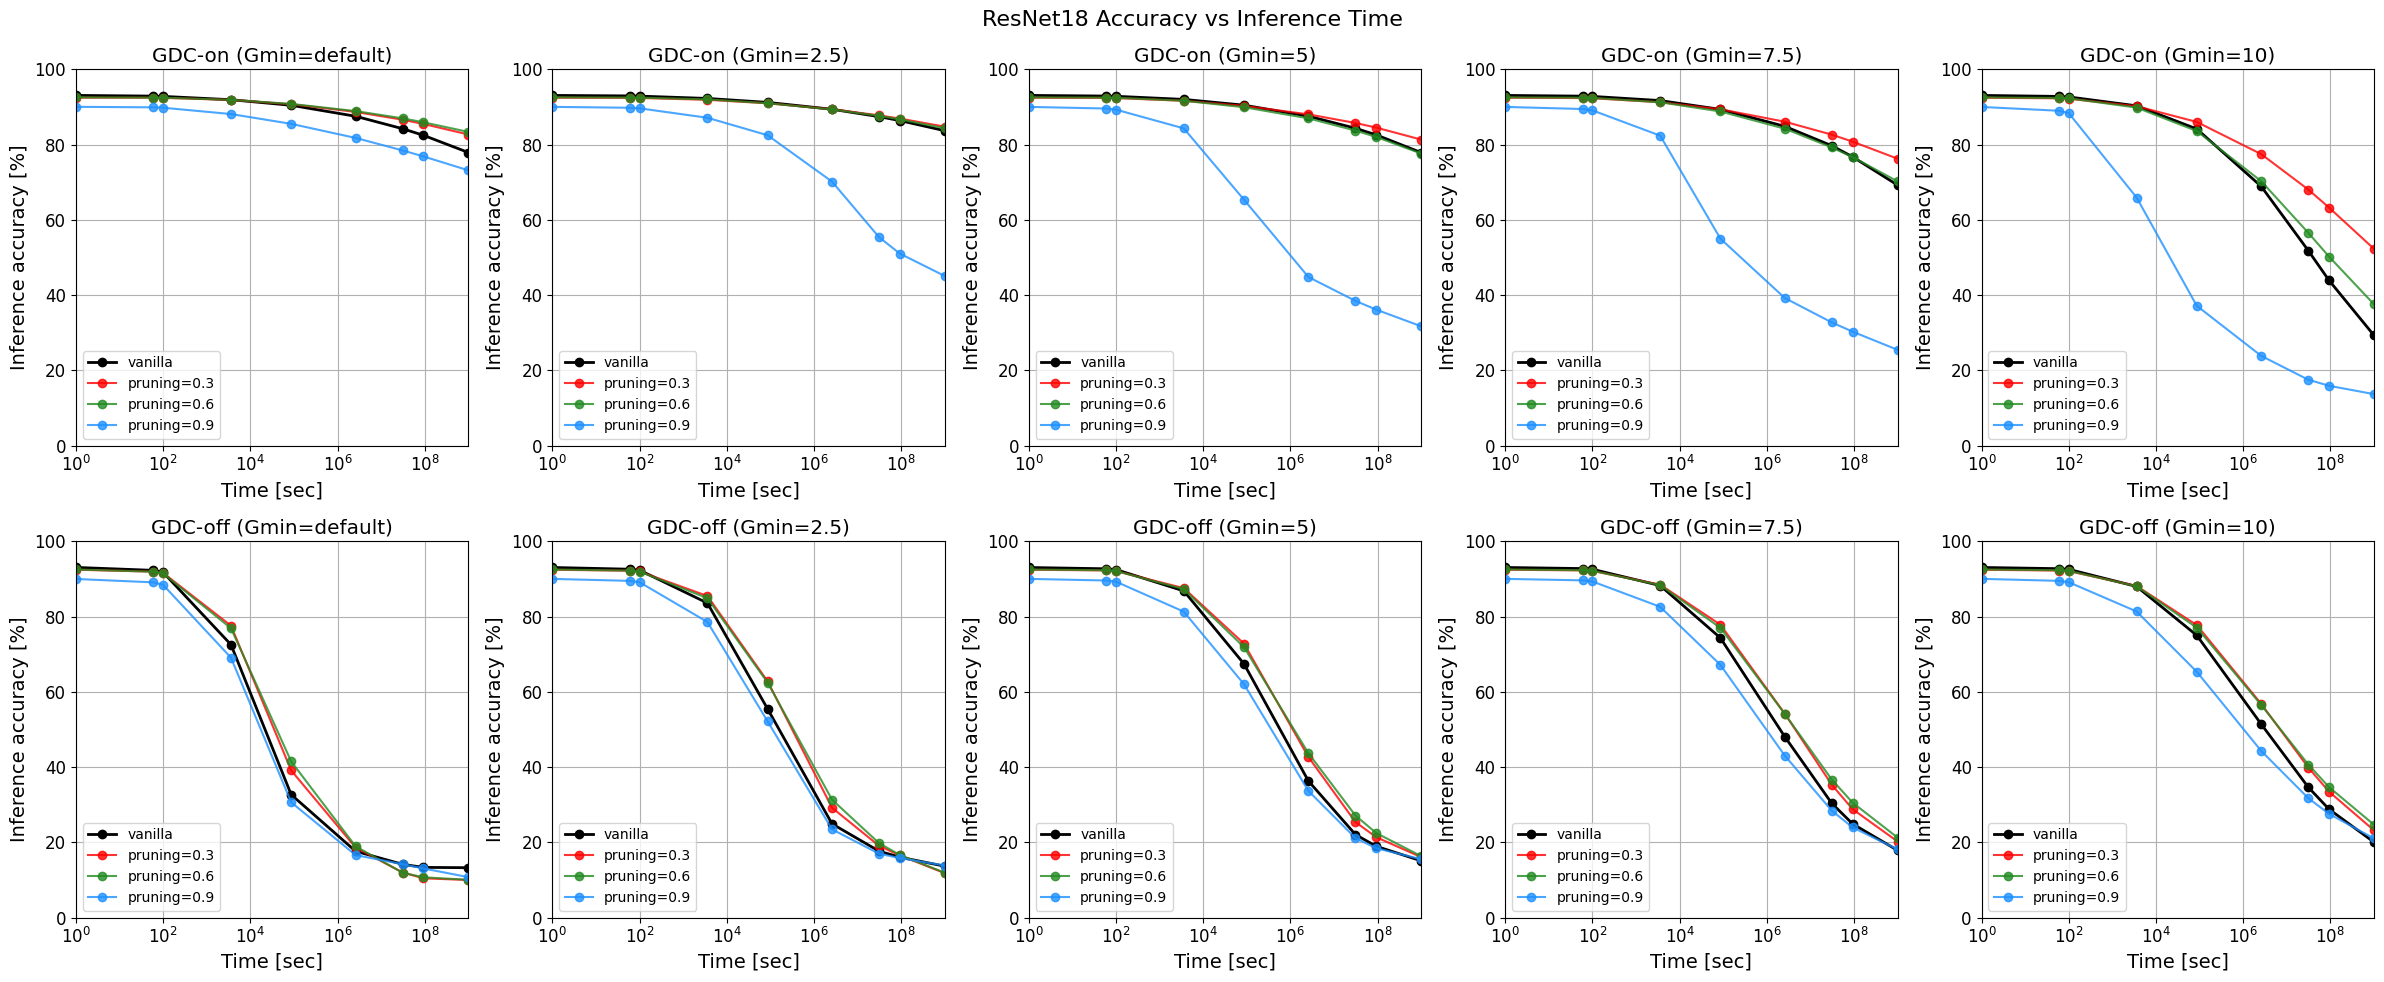

In [96]:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(24, 10))
plt.rcParams.update({'font.size': 12})

# Remove 'pruned' from model_type
df = df[~df['model_type'].str.endswith('pruned')]

# pruning별 색깔 고정
pruning_colors = {
    0.3: 'red',
    0.6: 'forestgreen',
    0.9: 'dodgerblue'
}

def plot_accuracy_pruning(ax, data, gmin_val, gdc_val):
    ax.grid(True)
    
    # Plot vanilla model first
    vanilla_df = data[data['model_type'] == 'vanilla']
    if not vanilla_df.empty:
        ax.plot(vanilla_df['inf_time'], vanilla_df['accuracy'], 
                color='black', marker='o', label='vanilla', linewidth=2)
    
    # Plot each pruning ratio
    for pruning_val in [0.3, 0.6, 0.9]:
        df_pruning = data[data['pruning'] == pruning_val]
        if not df_pruning.empty:
            ax.plot(df_pruning['inf_time'], df_pruning['accuracy'], 
                    color=pruning_colors[pruning_val],
                    marker='o', label=f'pruning={pruning_val}', alpha=0.8)
    
    ax.set_title(f"GDC-{gdc_val} (Gmin={gmin_val})")
    ax.set_xlabel('Time [sec]', fontsize=14)
    ax.set_ylabel('Inference accuracy [%]', fontsize=14)
    ax.set_ylim(0, 100)
    ax.set_xlim(1, 1000000000)
    ax.set_xscale('log')
    ax.legend(fontsize=10, loc='lower left')

# Get unique Gmin values
gmin_values = df['Gmin'].unique() # Take first 4 Gmin values

# GDC-on (top row)
for idx, gmin_val in enumerate(gmin_values):
    data_filtered = df[(df['Gmin'] == gmin_val) & (df['GDC'] == 'on')]
    plot_accuracy_pruning([ax1, ax2, ax3, ax4, ax5][idx], data_filtered, gmin_val, 'on')

# GDC-off (bottom row)
for idx, gmin_val in enumerate(gmin_values):
    data_filtered = df[(df['Gmin'] == gmin_val) & (df['GDC'] == 'off')]
    plot_accuracy_pruning([ax6, ax7, ax8, ax9, ax10][idx], data_filtered, gmin_val, 'off')

plt.suptitle('ResNet18 Accuracy vs Inference Time', fontsize=16)
plt.tight_layout()
plt.show()

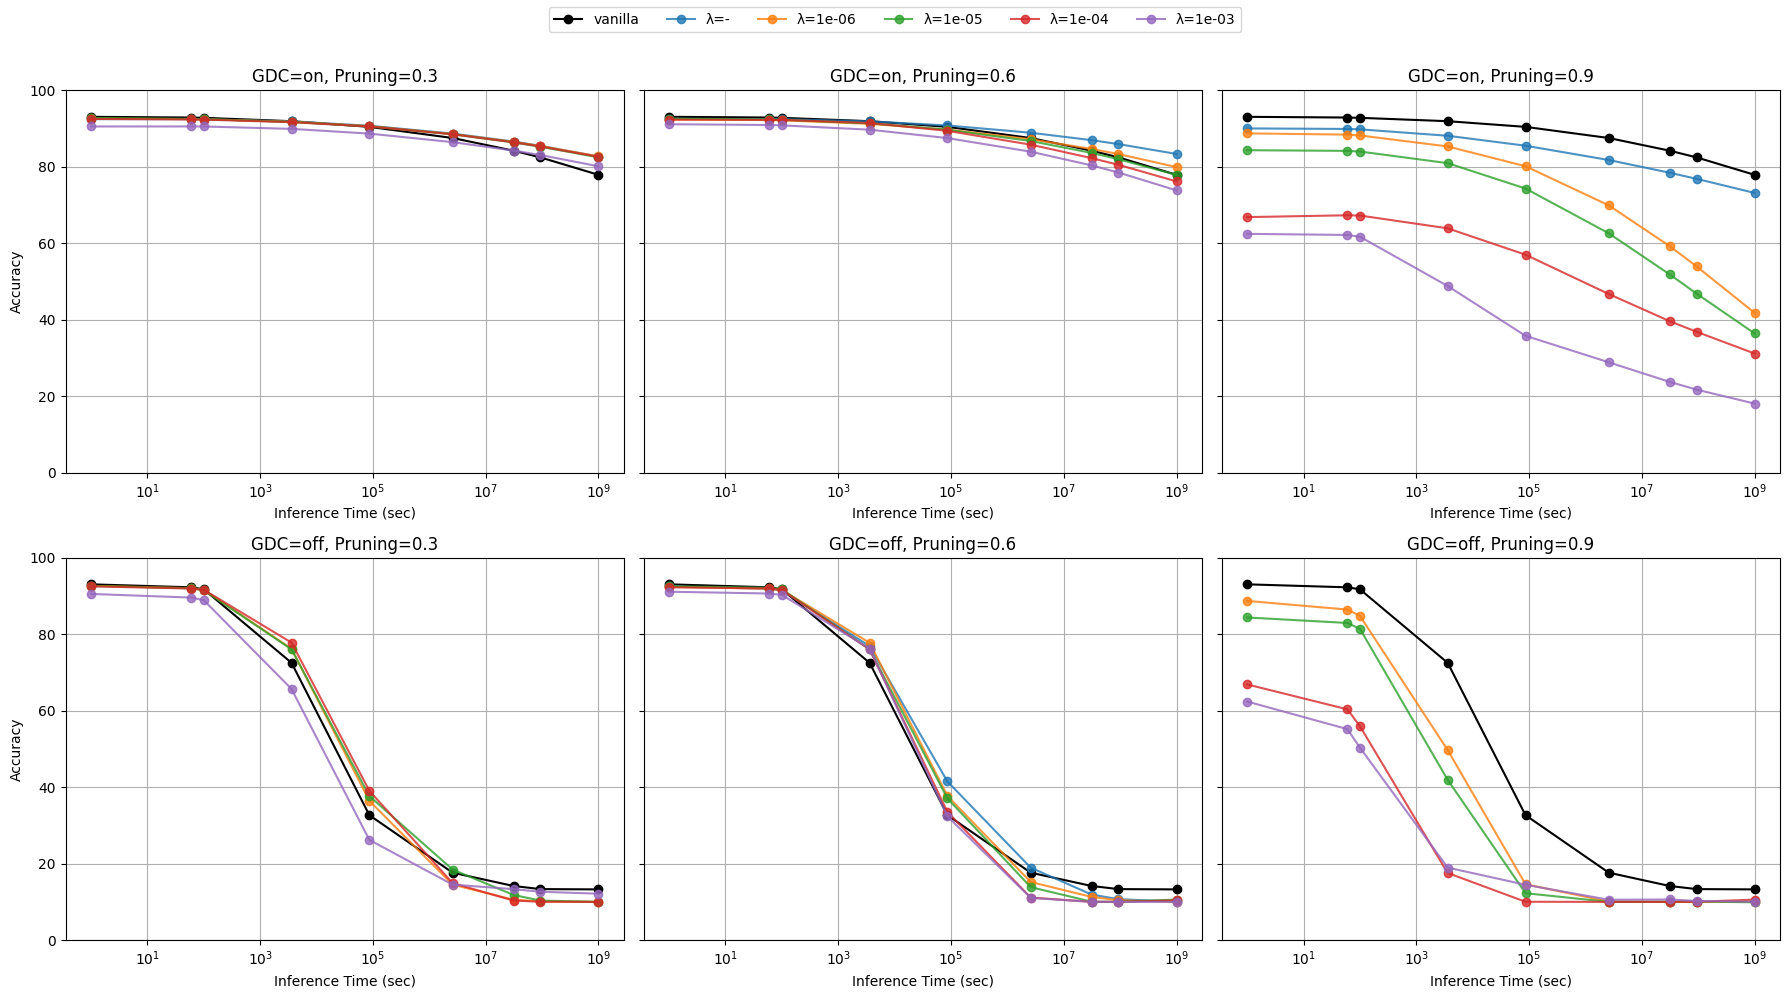

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# pruning 값 리스트
pruning_values = [0.3, 0.6, 0.9]
gdc_values = ['on', 'off']

# 'pruned'로 끝나는 model_type 삭제
df = df[~df['model_type'].str.endswith('pruned')]
# df = df[~ (df['custom_loss'] == 'smooth_inverse')]

# subplot 만들기 (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3 , figsize=(18, 10), sharey=True)

for row_idx, gdc_val in enumerate(gdc_values):
    for col_idx, pruning_val in enumerate(pruning_values):
        ax = axes[row_idx, col_idx]
        sub_df = df[(df['pruning'] == pruning_val) & (df['GDC'] == gdc_val)]

        # === 1. 먼저 vanilla curve 그리기 ===
        vanilla_df = df[(df['model_type'] == 'vanilla') & (df['GDC'] == gdc_val)]
        if not vanilla_df.empty:
            ax.plot(vanilla_df['inf_time'], vanilla_df['accuracy'], color='black', marker='o', label='vanilla')

        # === 2. 그 다음 나머지 (NegReg_lambda 별) curve 그리기 ===
        negreg_values = sub_df['lambda'].unique()
        negreg_dash = [v for v in negreg_values if v == '-']
        negreg_nums = sorted([float(v) for v in negreg_values if v != '-'])
        
        for negreg_lambda in negreg_dash + negreg_nums:
            if negreg_lambda == '-':
                plot_df = sub_df[sub_df['lambda'] == '-']
                label = 'λ=-'
            else:
                numeric_mask = sub_df['lambda'] != '-'
                match_mask = sub_df.loc[numeric_mask, 'lambda'].astype(float) == negreg_lambda
                plot_df = sub_df.loc[numeric_mask].loc[match_mask]
                label = f"λ={negreg_lambda:.0e}"

            if not plot_df.empty:
                ax.plot(plot_df['inf_time'], plot_df['accuracy'], marker='o', label=label, alpha=0.8)

        ax.set_title(f'GDC={gdc_val}, Pruning={pruning_val}')
        ax.set_xlabel('Inference Time (sec)')
        if col_idx == 0:
            ax.set_ylabel('Accuracy')
        ax.grid(True)
        ax.set_xscale('log')
        ax.set_ylim(0, 100)

# Legend 통합
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


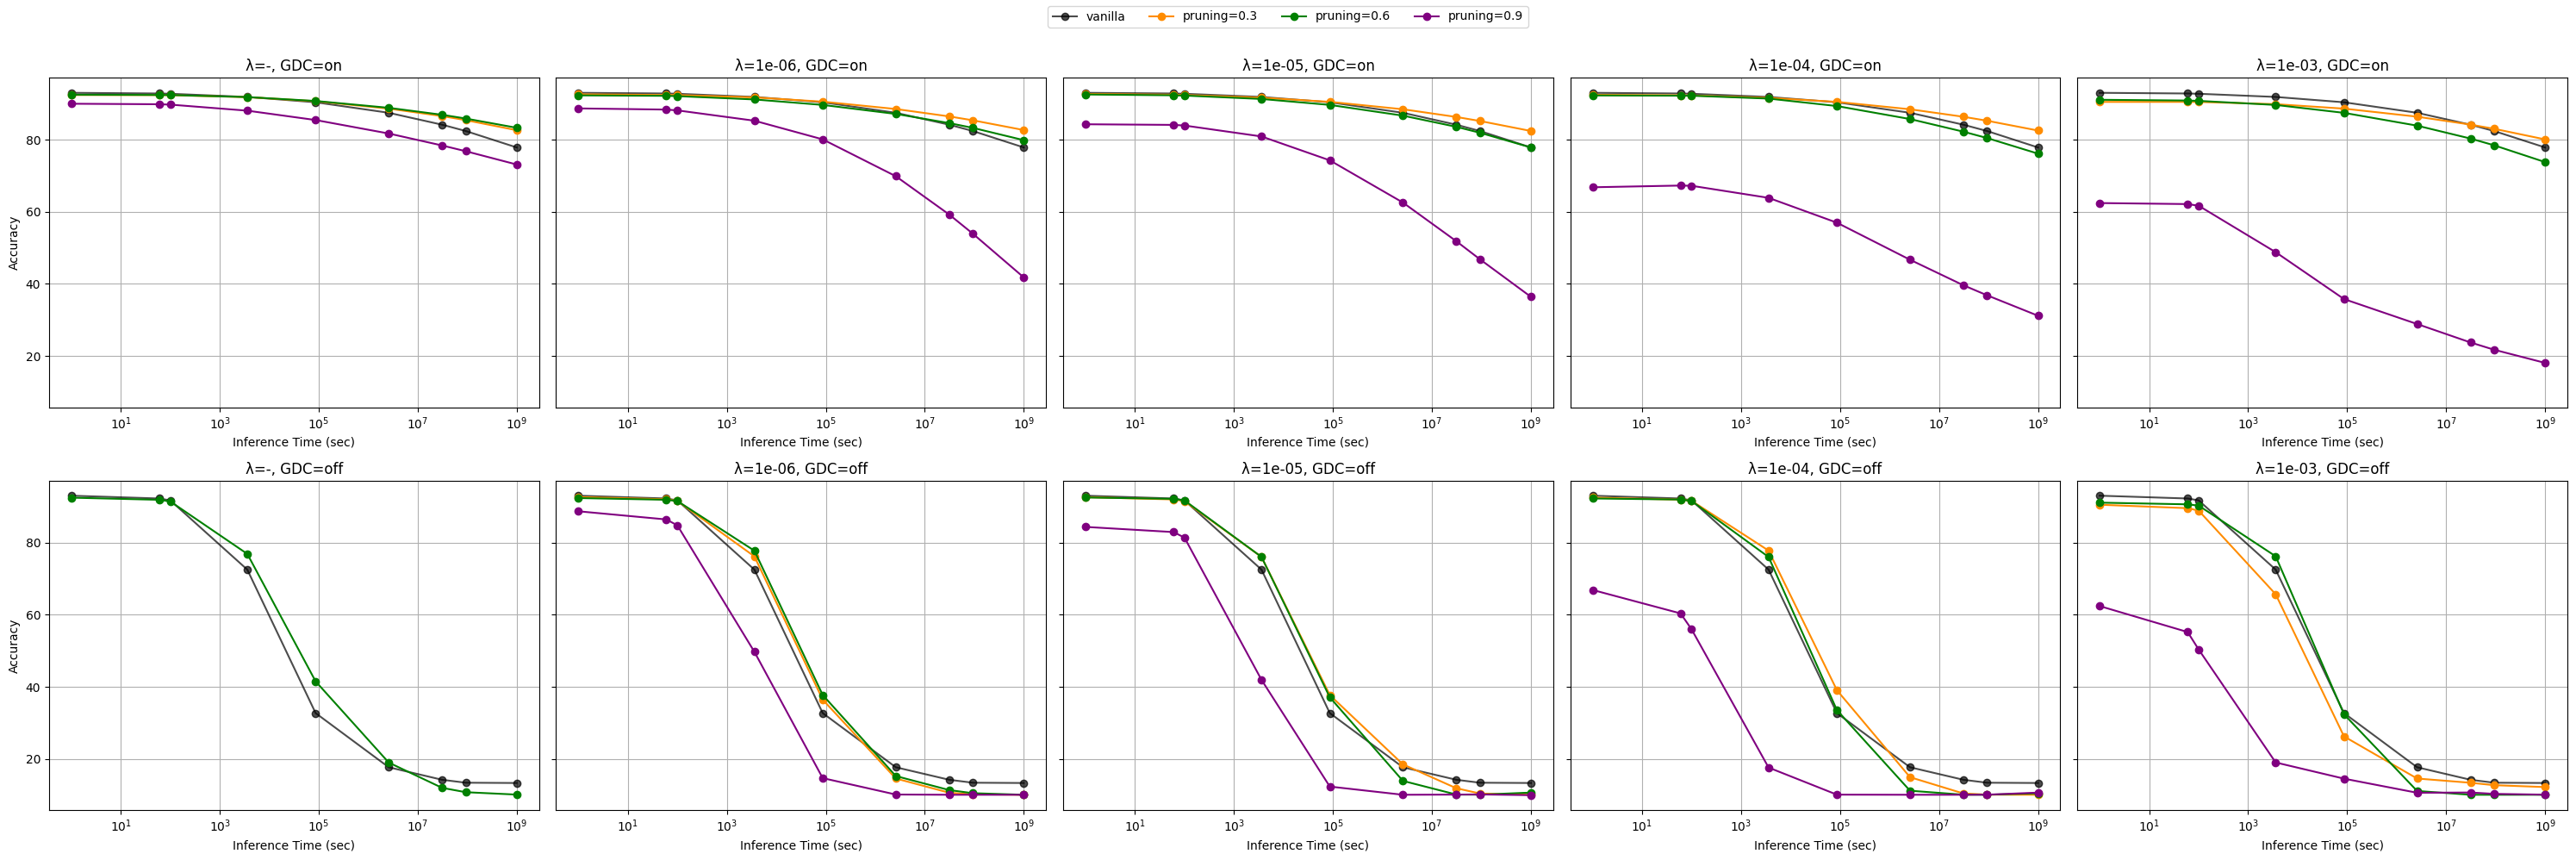

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# pruning 값 리스트
pruning_values = [0.3, 0.6, 0.9]
gdc_values = ['on', 'off']

# pruning별 색깔 고정
pruning_colors = {
    0.3: 'darkorange',
    # 0.5: 'blue',
    0.6: 'green',
    # 0.7: 'red',
    0.9: 'purple'
}

# 'pruned'로 끝나는 model_type 삭제
df = df[~df['model_type'].str.endswith('pruned')]

# subplot 만들기 (2 rows, N columns) → NegReg_lambda 유니크 개수만큼
negreg_unique = df['lambda'].unique()
negreg_dash = [v for v in negreg_unique if v == '-']
negreg_nums = sorted([float(v) for v in negreg_unique if v != '-'])
negreg_order = negreg_dash + negreg_nums  # '-' 먼저, 숫자 순서대로

n_cols = len(negreg_order)
fig, axes = plt.subplots(2, n_cols, figsize=(6 * n_cols, 10), sharey=True)

for row_idx, gdc_val in enumerate(gdc_values):
    for col_idx, negreg_lambda in enumerate(negreg_order):
        ax = axes[row_idx, col_idx] if n_cols > 1 else axes[row_idx]
        
        if negreg_lambda == '-':
            sub_df = df[(df['lambda'] == '-') & (df['GDC'] == gdc_val)]
            title_lambda = 'λ=-'
        else:
            numeric_mask = df['lambda'] != '-'
            sub_df = df.loc[numeric_mask]
            sub_df = sub_df[(sub_df['lambda'].astype(float) == negreg_lambda) & (sub_df['GDC'] == gdc_val)]
            title_lambda = f"λ={negreg_lambda:.0e}"

        # === 1. vanilla curve 먼저 그리기 ===
        vanilla_df = df[(df['model_type'] == 'vanilla') & (df['GDC'] == gdc_val)]
        if not vanilla_df.empty:
            ax.plot(vanilla_df['inf_time'], vanilla_df['accuracy'], color='black', marker='o', label='vanilla', alpha=0.7)

        # === 2. pruning 값별로 그리기 ===
        for pruning_val in pruning_values:
            plot_df = sub_df[sub_df['pruning'] == pruning_val]
            if not plot_df.empty:
                ax.plot(plot_df['inf_time'], plot_df['accuracy'], 
                        color=pruning_colors[pruning_val], marker='o', 
                        label=f'pruning={pruning_val}')

        ax.set_title(f'{title_lambda}, GDC={gdc_val}')
        ax.set_xlabel('Inference Time (sec)')
        if col_idx == 0:
            ax.set_ylabel('Accuracy')
        ax.grid(True)
        ax.set_xscale('log')
        # ax.set_ylim(60, 100)

# Legend 통합
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [13]:
df_o_o_pivot = df_ideal_gdc.pivot_table(index=pivot_index, columns='model_type', values='accuracy', aggfunc='mean')
df_o_o_pivot.reset_index(inplace=True) # index to columns 

df_o_x_pivot = df_ideal_gdcx.pivot_table(index=pivot_index, columns='model_type', values='accuracy', aggfunc='mean')
df_o_x_pivot.reset_index(inplace=True) # index to columns 

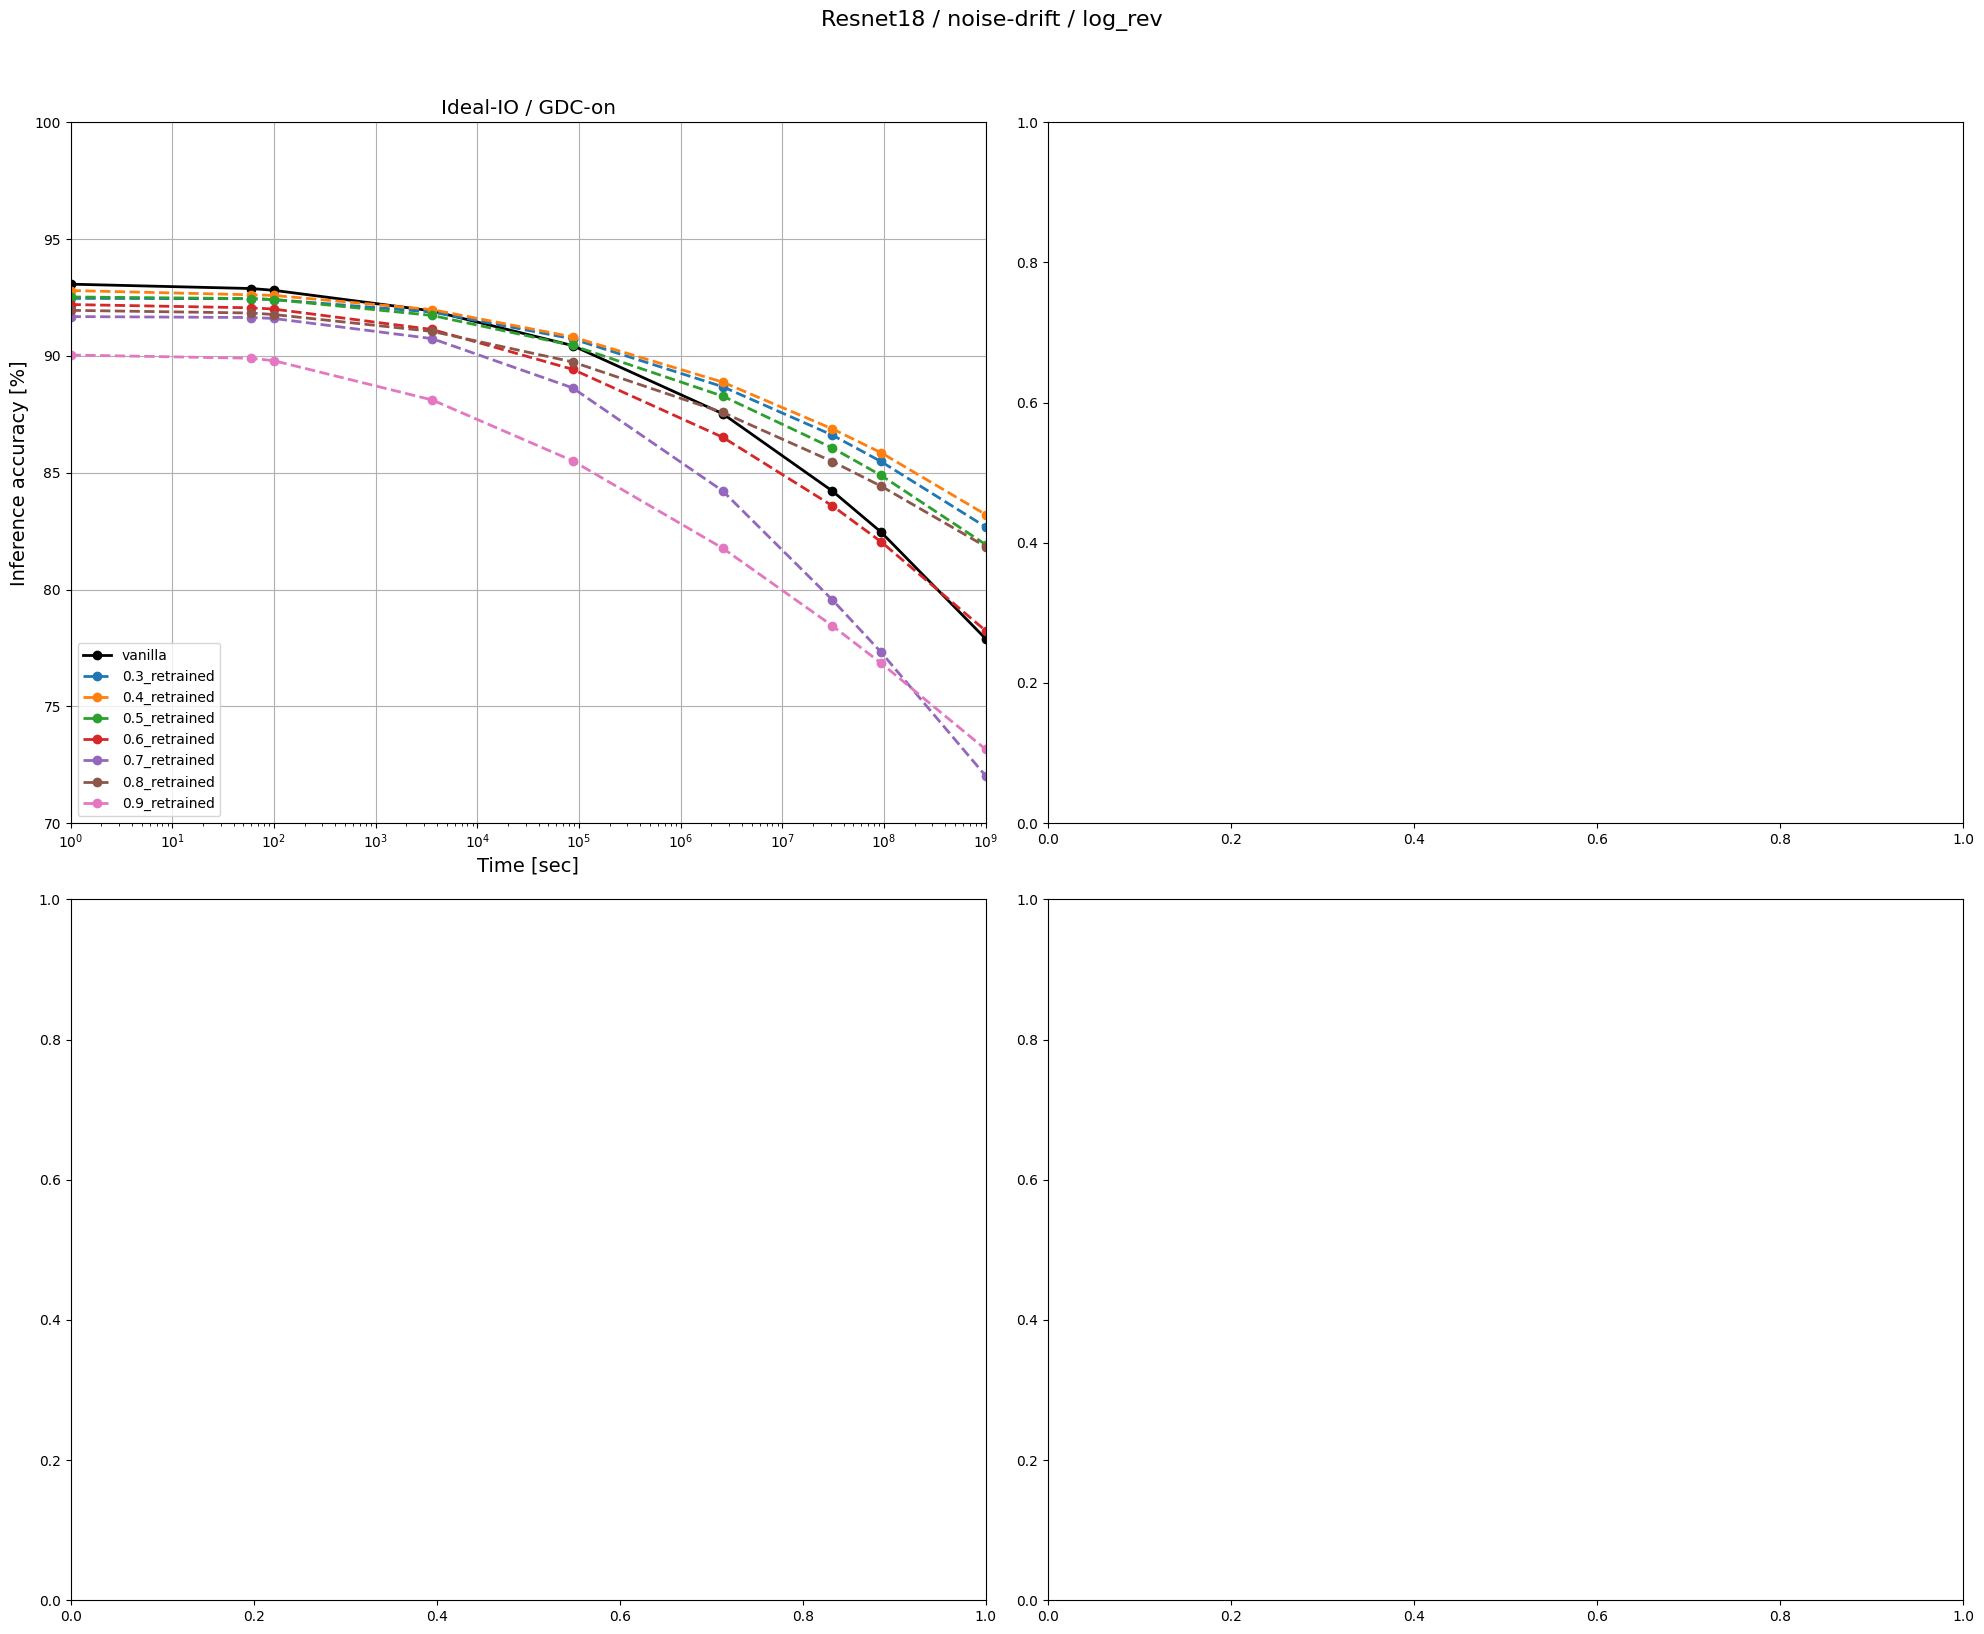

In [14]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
plt.rcParams.update({'font.size': 12})

# Common plotting function
def plot_accuracy_re(ax, df_pivot, title):
    x = df_pivot['inf_time']
    
    ax.grid(True)
    ax.plot(x, df_pivot['vanilla'], marker='o', label='vanilla', linewidth=2, color='k')
    
    for ratio in ['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']:
        ax.plot(x, df_pivot[f'{ratio}_retrained'], marker='o', 
                label=f'{ratio}_retrained', linestyle='--', linewidth=2)
    
    ax.set_title(title)
    ax.set_xlabel('Time [sec]', fontsize=14)
    ax.set_ylabel('Inference accuracy [%]', fontsize=14)
    ax.set_ylim(70, 100)
    ax.set_xlim(1, 1000000000)
    ax.set_xscale('log')
    ax.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))

# Plot each condition
plot_accuracy_re(ax1, df_o_o_pivot, "Ideal-IO / GDC-on")
# plot_accuracy_re(ax2, df_o_x_pivot, "Ideal-IO / GDC-off")
# plot_accuracy_re(ax3, df_x_o_pivot, "Nonideal-IO / GDC-on")
# plot_accuracy_re(ax4, df_x_x_pivot, "Nonideal-IO / GDC-off")


plt.suptitle("Resnet18 / noise-drift / log_rev", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

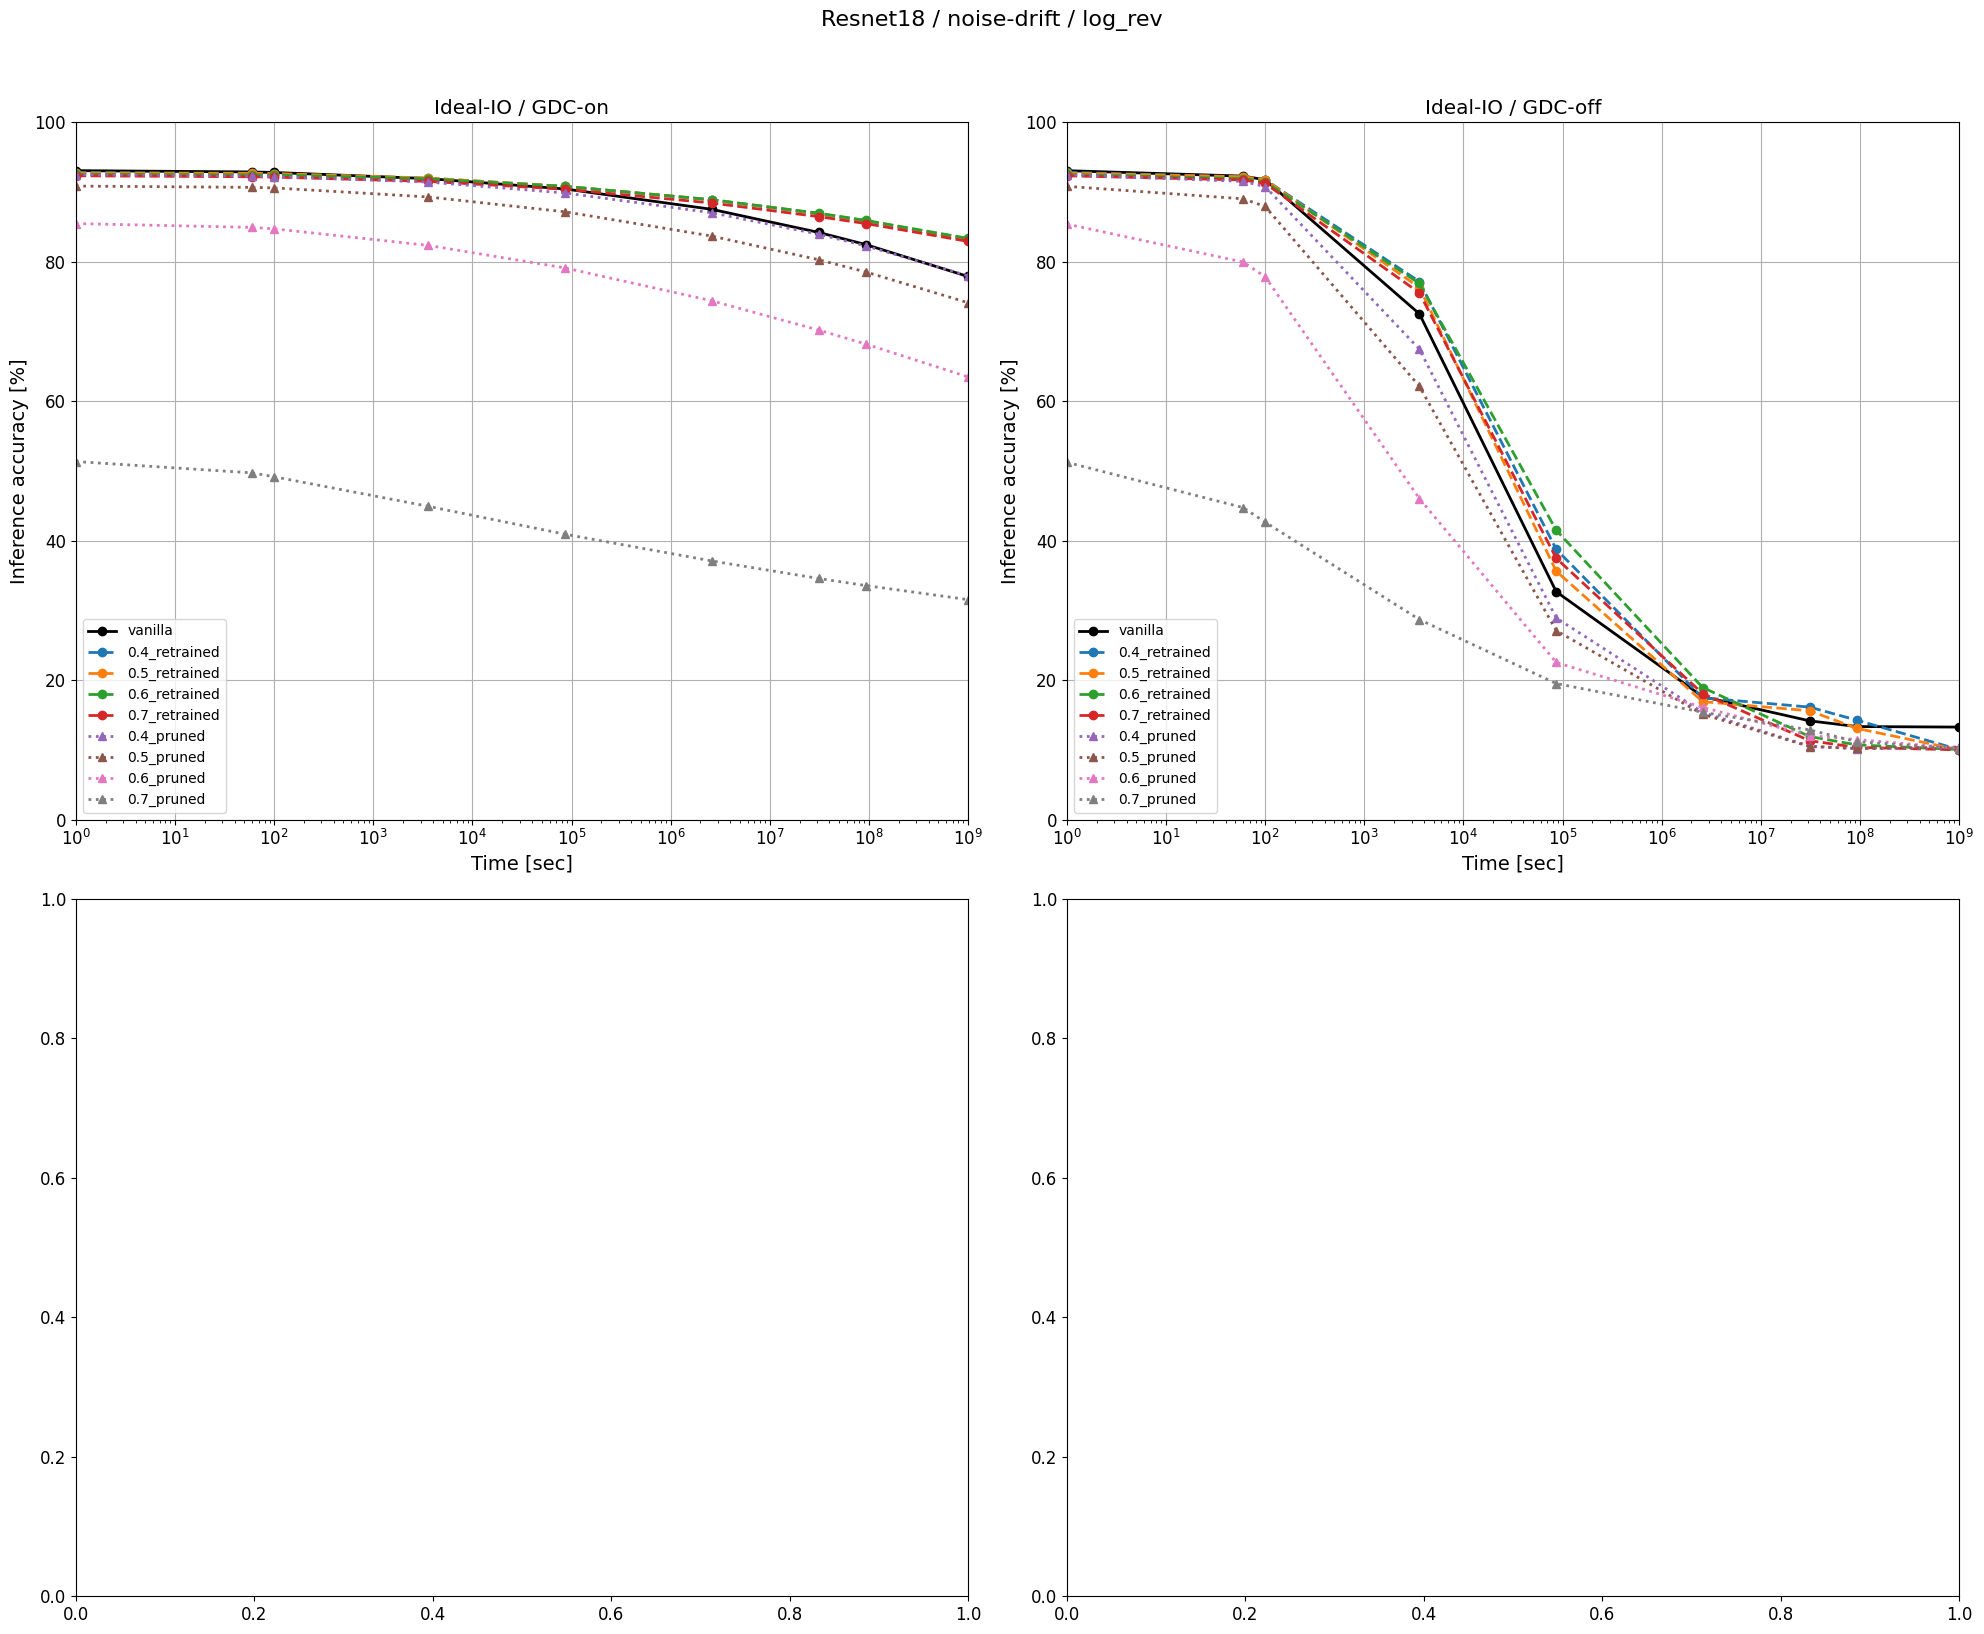

In [26]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
plt.rcParams.update({'font.size': 12})

def plot_accuracy(ax, df_pivot, title):
    x = df_pivot['inf_time']
    
    ax.grid(True)
    ax.plot(x, df_pivot['vanilla'], marker='o', label='vanilla', linewidth=2, color='k')
    
    # Plot retrained models
    for ratio in [ '0.4', '0.5', '0.6', '0.7']:
        ax.plot(x, df_pivot[f'{ratio}_retrained'], marker='o', 
                label=f'{ratio}_retrained', linestyle='--', linewidth=2)
    
    # Plot pruned models
    for ratio in ['0.4', '0.5', '0.6', '0.7']:
        ax.plot(x, df_pivot[f'{ratio}_pruned'], marker='^', 
                label=f'{ratio}_pruned', linestyle=':', linewidth=2)
    
    ax.set_title(title)
    ax.set_xlabel('Time [sec]', fontsize=14)
    ax.set_ylabel('Inference accuracy [%]', fontsize=14)
    ax.set_ylim(0, 100)
    ax.set_xlim(1, 1000000000)
    ax.set_xscale('log')
    ax.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))

# Plot each condition
plot_accuracy(ax1, df_o_o_pivot, "Ideal-IO / GDC-on")
plot_accuracy(ax2, df_o_x_pivot, "Ideal-IO / GDC-off")
# plot_accuracy_re(ax3, df_x_o_pivot, "Nonideal-IO / GDC-on")
# plot_accuracy_re(ax4, df_x_x_pivot, "Nonideal-IO / GDC-off")

plt.suptitle("Resnet18 / noise-drift / log_rev", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

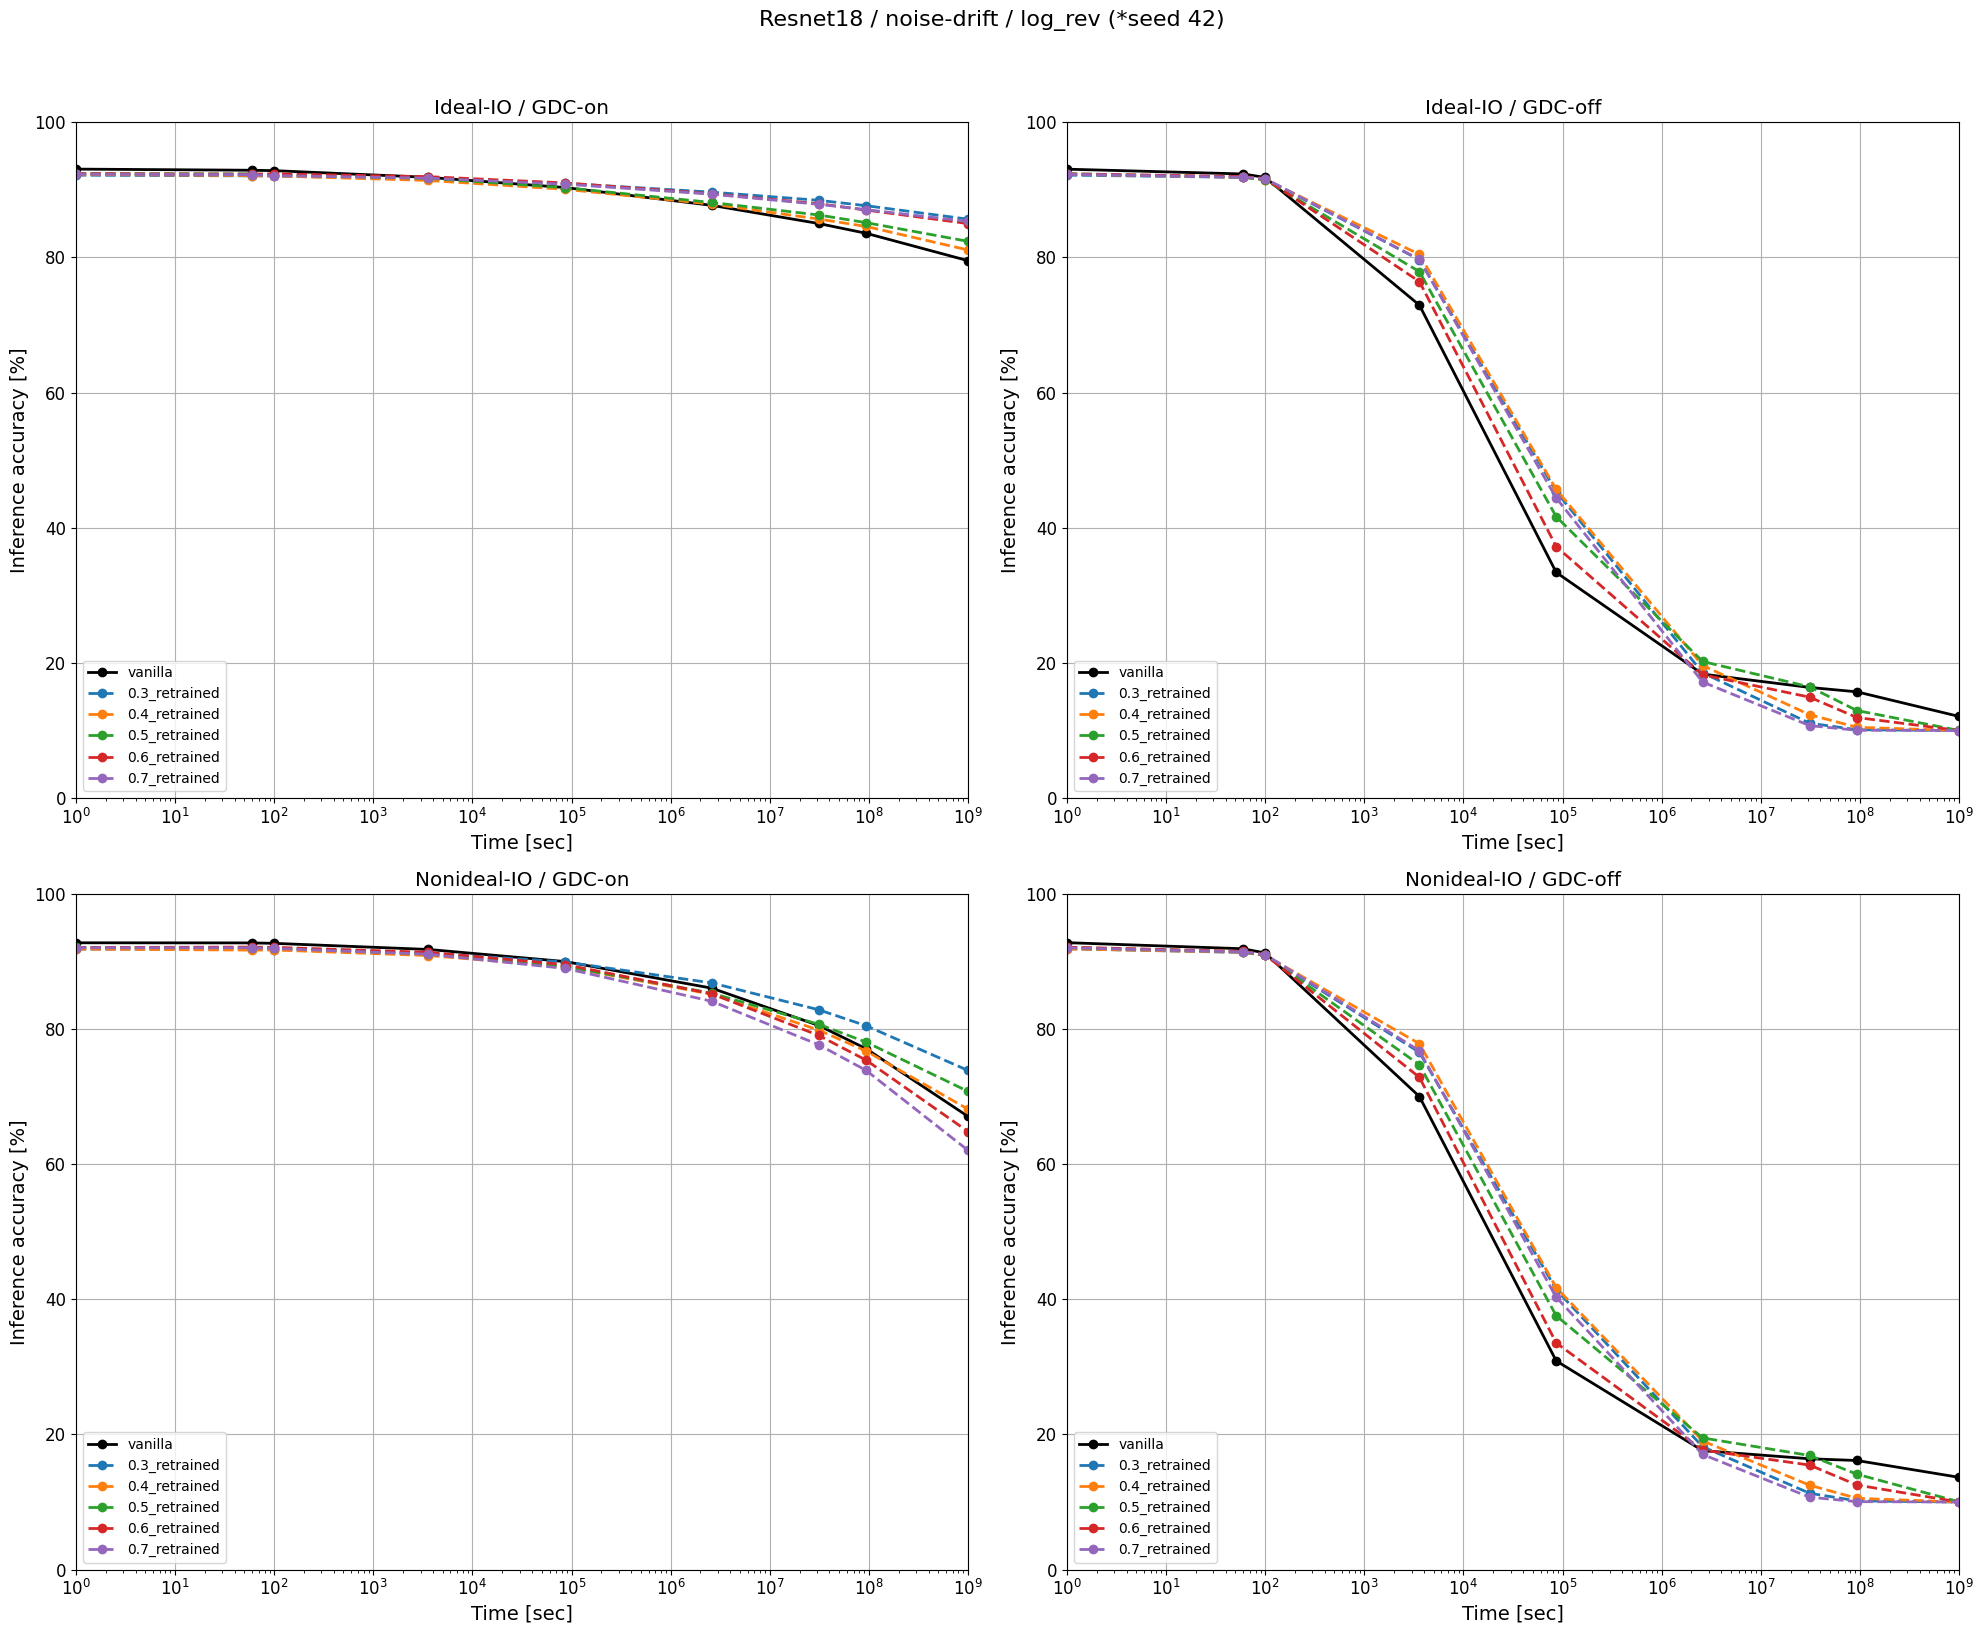

In [61]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
plt.rcParams.update({'font.size': 12})

def plot_accuracy_re(ax, df_pivot, title):
    x = df_pivot['inf_time']
    
    ax.grid(True)
    ax.plot(x, df_pivot['vanilla'], marker='o', label='vanilla', linewidth=2, color='k')
    
    # Plot retrained models
    for ratio in ['0.3', '0.4', '0.5', '0.6', '0.7']:
        ax.plot(x, df_pivot[f'{ratio}_retrained'], marker='o', 
                label=f'{ratio}_retrained', linestyle='--', linewidth=2)
    
    # # Plot pruned models
    # for ratio in ['0.3', '0.4', '0.5', '0.6', '0.7']:
    #     ax.plot(x, df_pivot[f'{ratio}_pruned'], marker='^', 
    #             label=f'{ratio}_pruned', linestyle=':', linewidth=2)
    
    ax.set_title(title)
    ax.set_xlabel('Time [sec]', fontsize=14)
    ax.set_ylabel('Inference accuracy [%]', fontsize=14)
    ax.set_ylim(0, 100)
    ax.set_xlim(1, 1000000000)
    ax.set_xscale('log')
    ax.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))

# Plot each condition
plot_accuracy_re(ax1, df_o_o_pivot, "Ideal-IO / GDC-on")
plot_accuracy_re(ax2, df_o_x_pivot, "Ideal-IO / GDC-off")
plot_accuracy_re(ax3, df_x_o_pivot, "Nonideal-IO / GDC-on")
plot_accuracy_re(ax4, df_x_x_pivot, "Nonideal-IO / GDC-off")

plt.suptitle("Resnet18 / noise-drift / log_rev (*seed 42)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

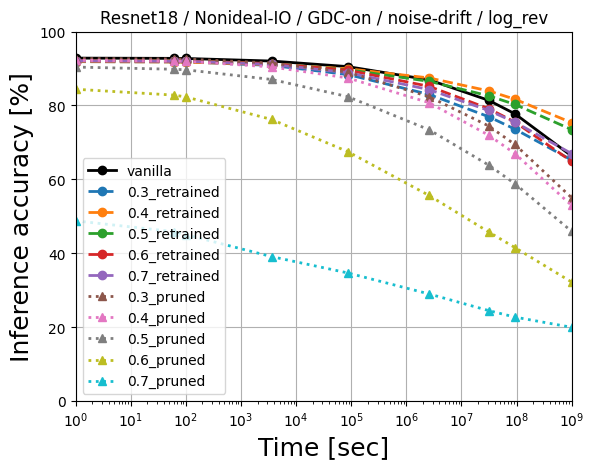

In [ ]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['vanilla'], marker='o', label = 'vanilla', linewidth=2, color='k')

plt.plot(x,df_pivot['0.3_retrained'], marker='o', label = '0.3_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_retrained'], marker='o', label = '0.4_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_retrained'], marker='o', label = '0.5_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_retrained'], marker='o', label = '0.6_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_retrained'], marker='o', label = '0.7_retrained', linestyle='--', linewidth=2)

plt.plot(x,df_pivot['0.3_pruned'], marker='^', label = '0.3_pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.4_pruned'], marker='^', label = '0.4_pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.5_pruned'], marker='^', label = '0.5_pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.6_pruned'], marker='^', label = '0.6_pruned', linestyle=':', linewidth=2)
plt.plot(x,df_pivot['0.7_pruned'], marker='^', label = '0.7_pruned', linestyle=':', linewidth=2)


plt.title("Resnet18 / Nonideal-IO / GDC-on / noise-drift / log_rev")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

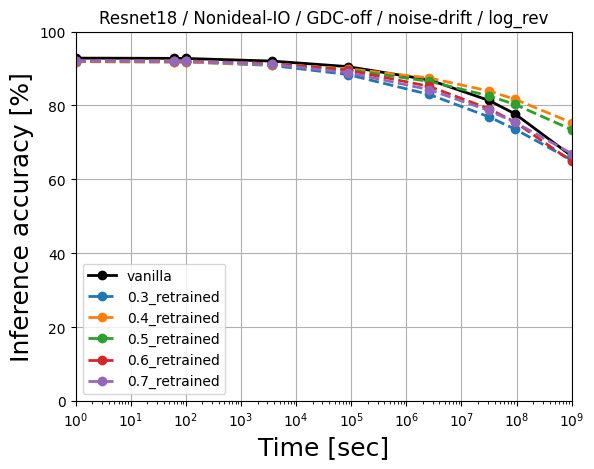

In [59]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['vanilla'], marker='o', label = 'vanilla', linewidth=2, color='k')

plt.plot(x,df_pivot['0.3_retrained'], marker='o', label = '0.3_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.4_retrained'], marker='o', label = '0.4_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.5_retrained'], marker='o', label = '0.5_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.6_retrained'], marker='o', label = '0.6_retrained', linestyle='--', linewidth=2)
plt.plot(x,df_pivot['0.7_retrained'], marker='o', label = '0.7_retrained', linestyle='--', linewidth=2)


plt.title("Resnet18 / Nonideal-IO / GDC-off / noise-drift / log_rev")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

In [48]:
df2 = df_raw.copy()

In [49]:
# df = df[df['drift_model'] == 0.01]
df2 = df2[df2['Gmin']=='default']
df2 = df2[df2['fix_seed']==42]
df2 = df2[(df2['lr']==1e-4) | (df2['lr']=='-')]

In [50]:
df2['drift_model'].unique()

array(['log_rev', 'test1', 'test2', 'test3', 'test4', 'test5'],
      dtype=object)

In [51]:
df2['new_col'] = df2['model_type'].astype(str) + '_' + df2['drift_model'].astype(str) 
df2['new_col'].unique()

array(['vanilla_log_rev', '0.3_retrained_log_rev',
       '0.4_retrained_log_rev', '0.5_retrained_log_rev',
       '0.6_retrained_log_rev', '0.7_retrained_log_rev',
       '0.3_pruned_log_rev', '0.4_pruned_log_rev', '0.5_pruned_log_rev',
       '0.6_pruned_log_rev', '0.7_pruned_log_rev', 'vanilla_test1',
       '0.3_retrained_test1', '0.4_retrained_test1',
       '0.5_retrained_test1', '0.6_retrained_test1',
       '0.7_retrained_test1', 'vanilla_test2', '0.3_retrained_test2',
       '0.4_retrained_test2', '0.5_retrained_test2',
       '0.6_retrained_test2', '0.7_retrained_test2', 'vanilla_test3',
       '0.3_retrained_test3', '0.4_retrained_test3',
       '0.5_retrained_test3', '0.6_retrained_test3',
       '0.7_retrained_test3', 'vanilla_test4', '0.3_retrained_test4',
       '0.4_retrained_test4', '0.5_retrained_test4',
       '0.6_retrained_test4', '0.7_retrained_test4', 'vanilla_test5',
       '0.3_retrained_test5', '0.4_retrained_test5',
       '0.5_retrained_test5', '0.6_retraine

In [52]:
df2_ideal_gdc = df2[(df2['IOparameter'] == 'ideal') & (df2['GDC'] == 'on')]
df2_ideal_gdcx = df2[(df2['IOparameter'] == 'ideal') & (df2['GDC'] == 'off')]

In [53]:
df2_o_o_pivot = df2_ideal_gdc.pivot_table(index=pivot_index, columns='new_col', values='accuracy', aggfunc='mean')
df2_o_o_pivot.reset_index(inplace=True) # index to columns 

df2_o_x_pivot = df2_ideal_gdcx.pivot_table(index=pivot_index, columns='new_col', values='accuracy', aggfunc='mean')
df2_o_x_pivot.reset_index(inplace=True) # index to columns 

In [56]:
# Save pivot table to Excel
output_path = "drift_model_comparison_GDC_on.xlsx"
df2_o_o_pivot.to_excel(output_path, index=True, engine='openpyxl')
print(f"Saved to {output_path}")

Saved to drift_model_comparison_GDC_on.xlsx
